In [ ]:
import sys
sys.path.append('../')


import pandas as pd
import matplotlib.pyplot as plt
from config import BaseConfig
from utils.plots import plot_migration_map_local
from utils.graph.build import build_geo_network

In [ ]:
from platform import platform
from types import ModuleType


def setup_plt_chinese(plt_module: ModuleType=None) -> ModuleType:
    if plt_module is None:
        import matplotlib.pyplot as plt_module
        
    # --- CHINESE FONT CONFIGURATION ---
    system_name = platform.system()
    if system_name == "Windows":
        # SimHei is the standard Chinese font on Windows
        plt_module.rcParams['font.sans-serif'] = ['SimHei'] 
    elif system_name == "Darwin": 
        # MacOS usually uses Heiti TC or Arial Unicode MS
        plt_module.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
    else:
        # Linux (requires installing a Chinese font, e.g., WenQuanYi)
        plt_module.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']

    # This fixes an issue where the minus sign '-' becomes a square when using Chinese fonts
    plt_module.rcParams['axes.unicode_minus'] = False
    # 1. SET THE FONT (Run this once)
    sys_os = platform.system()
    if sys_os == 'Windows':
        plt_module.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
    elif sys_os == 'Darwin': # Mac
        plt_module.rcParams['font.sans-serif'] = ['Heiti TC', 'PingFang HK', 'Arial Unicode MS']
    plt_module.rcParams['axes.unicode_minus'] = False
    return plt_module


In [4]:
CONFIG = BaseConfig()
plt = setup_plt_chinese(plt)

In [5]:
data_df = pd.read_csv(CONFIG.data_csv_path)

In [6]:
data_df.head()

,current_province,current_city,current_county,current_members_live_with,gender,year_born,edu_level,hometown_code,hometown,year_current_flow,...,hometown_Name_County,hometown_lon,hometown_lat,first_Name_Province,first_Name_Prefecture,first_Name_County,first_lon,first_lat,current_lon,current_lat
0,广东省,深圳市,光明新区,4,2,1989,4,360681,江西省鹰潭市贵溪市,2015,...,贵溪市,117.186973,28.188428,江西省,南昌市,青山湖区,115.905297,28.719082,NaN,NaN
1,广东省,深圳市,光明新区,3,2,1981,5,360402,江西省九江市濂溪区,2015,...,濂溪区,116.039436,29.634605,广东省,深圳市,南山区,113.937903,22.554902,NaN,NaN
2,福建省,厦门市,同安区,4,2,1986,4,511623,四川省广安市邻水县,2013,...,邻水县,106.991830,30.258922,福建省,泉州市,丰泽区,118.617882,24.922059,118.102758,24.776209
3,新疆生产建设兵团,第六师,军户农场,3,1,1973,3,652301,新疆维吾尔自治区昌吉回族自治州昌吉市,2000,...,昌吉市,87.059347,44.091644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,北京市,北京市,朝阳区,2,2,1984,5,511702,四川省达州市通川区,2010,...,通川区,107.432388,31.362205,四川省,成都市,武侯区,104.022906,30.610118,116.508837,39.951928


In [7]:
#give me how many registers with 'hometown_lon', 'hometown_lat','first_lon', 'first_lat', 'current_lon', 'current_lat'complete with no NA
#i need to discuss if this is ok jajaja but for the sake of it lets leave it like that
geo_subset_df = data_df.dropna(subset=CONFIG.geo_data_subset)

In [8]:
G = build_geo_network(geo_subset_df, 2000, 2001)

/Users/jasonfu/Projects/THU/network_science/migra-net-china/.venv/lib/python3.11/site-packages/geopandas/io/file.py:576: UserWarning: Could not parse column 'adcode' as JSON; leaving as string
  return pyogrio.read_dataframe(path_or_bytes, bbox=bbox, **kwargs)


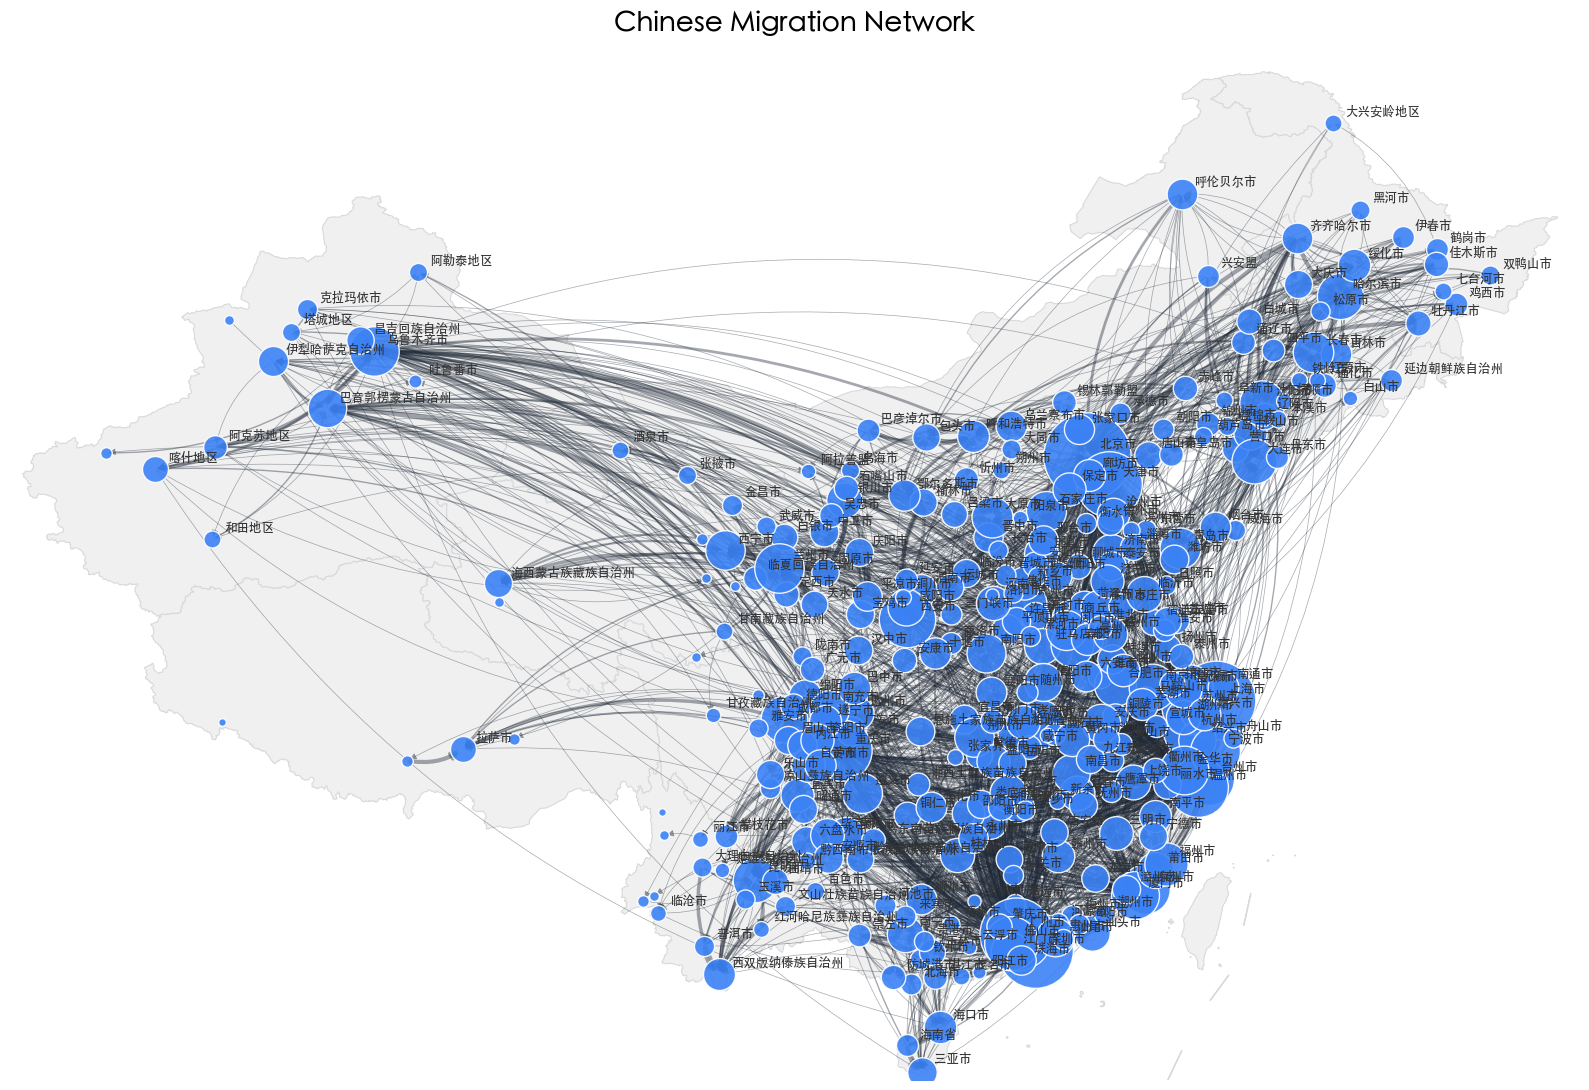

In [9]:
plot_migration_map_local(G, CONFIG)